In [1]:
# importing necesary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import yaml
import os


In [2]:
# Loading configuration and data

# loading configuration
with open('../config/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# loading the dataset
supply_chain_data_path = os.path.join('../', config['data']['raw_path'], 'DataCoSupplyChainDataset.csv')


supply_chain_data = pd.read_csv(supply_chain_data_path, encoding = 'ISO-8859-1')

In [3]:
# performing Exploratory data analysis - First few rows and summary statistics

# first few rows
print(supply_chain_data.head())

# Summary Statistics
print(supply_chain_data.describe())


       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

In [4]:
# Missing Values and Data Types

# missing values
print("Missing Values.\n", supply_chain_data.isnull().sum())

# data types
print("Data Types.\n", supply_chain_data.dtypes)

Missing Values.
 Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                 

In [5]:
# Data Cleaning

# Checking missing values
print("\n Missing values.")
missing_values = supply_chain_data.isnull().sum()
print(missing_values[missing_values > 0])


 Missing values.
Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64


In [6]:
# Handling missing values

# Dropping unnecessary columns with significant missing values
supply_chain_data.drop(columns=['Customer Lname', 'Order Zipcode', 'Product Description'], inplace = True)

# Filling the missing values in 'Customer Zipcode' with the mean of the column
mean_zipcode = int(supply_chain_data['Customer Zipcode'].mean())
supply_chain_data['Customer Zipcode'].fillna(mean_zipcode, inplace = True)


# verfying that there are no missing values in 'Customer  Zipcode'
print("Missing values in 'Customer Zipcode' after filling:",supply_chain_data['Customer Zipcode'].isnull().sum() )

# Verifying the dataset after dropping columns
print("Columns after dropping")
print(supply_chain_data.columns)

Missing values in 'Customer Zipcode' after filling: 0
Columns after dropping
Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Password', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Produ

C:\Users\Mich_Reano\AppData\Local\Temp\ipykernel_13620\244506479.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  supply_chain_data['Customer Zipcode'].fillna(mean_zipcode, inplace = True)


## Feature Engineering

## Why have i decide to take these features?
### 1. Order Item Discount:
- Discounts can siginifcantly influence customer purchaixng behaviour. Higher discounts might lead to increased demand as customers find products more affordable. This feature helps capture the effect of promotions on sales.
### 2. Order Item Discount Rate:
- Similar to the discount amount, the discount rate represents the percentage reduction in price. This can also influence customer decisions, particularly for high-value items where percentage discounts may be more enticing.
### 3. Order Item Product Price (without discount):
- The original price of a product is essential to understand the perceived value by customers. Products with higher original prices might have different demand patterns compared to lower-priced items, even if discounts are applied.
### 4. Order Item Total (total amount per order):
- Ths feature represents the total revenue generated from each order. It is an aggregate measure that combines both quantity and price , providing insights into the overall spending behaviour of customers.
### 5. Product Price:
- The final price customers pay after discounts is a direct determinant of sales. Products with competitive pricing might have higher demand compared to those priced higher.
### 6. Order Item quantity:
- This is the target variable we aim to predict. It represents the quantity of items ordered by customers and is directly tied to inventory management and demand forecasting.
### 7. Order Day:
- The specific day of the month can capture day-specific trends, such as payday effects or end-of-month sales pushes.
### 8. Order Month:
- Monthly trends are important are important for capturing seasonality. Certain products might have higher demand during specific months (e.g., holiday seasons, back-to-school periods).
### 9. Order year:
- The year feature can help capture log-term trends and changes in purchasing patterns over time.
### 10. Order Day of Week:
- Different days of the week might exhibit different demand patterns. For example, weekends might see higher sales compared to weekdays.
### 11. Order Week of Year:
- This feature helps capture weekly trends and seasonality, which is especially useful for products with weekly demand cycles.
### Is Weekend:
- A binary indicator of whether the order was placed on a weekend. This can help distinguish between weekday and weekend sales patterns.

In [7]:
supply_chain_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [8]:
supply_chain_data['Customer Segment']

0            Consumer
1            Consumer
2            Consumer
3         Home Office
4           Corporate
             ...     
180514    Home Office
180515      Corporate
180516      Corporate
180517       Consumer
180518       Consumer
Name: Customer Segment, Length: 180519, dtype: object

In [9]:
# encoding customer segments
def encode_customer_segment(supply_chain_data):
    # defining the mapping
    segment_mapping = {
        'Consumer' : 1,
        'Corporate' : 2,
        'Home Office' : 3
    }
    # applying the mapping to the customer segment column
    supply_chain_data['Customer Segment'] = supply_chain_data['Customer Segment'].map(segment_mapping)
    
    return supply_chain_data
# encoding customer segments
supply_chain_data = encode_customer_segment(supply_chain_data)

supply_chain_data['Customer Segment'].head()

0    1
1    1
2    1
3    3
4    2
Name: Customer Segment, dtype: int64

In [10]:
# function to derive related features

def derive_date_features(supply_chain_data):
    # Ensure the order date column is in datetime format
    supply_chain_data['order date (DateOrders)'] = pd.to_datetime(supply_chain_data['order date (DateOrders)'], errors = 'coerce')

    # Exracting date features
    supply_chain_data['Order Day'] = supply_chain_data['order date (DateOrders)'].dt.day
    supply_chain_data['Order Month'] = supply_chain_data['order date (DateOrders)'].dt.month
    supply_chain_data['Order Year'] = supply_chain_data['order date (DateOrders)'].dt.year
    supply_chain_data['Order Day of Week'] = supply_chain_data['order date (DateOrders)'].dt.dayofweek
    supply_chain_data['Order Week of Year'] = supply_chain_data['order date (DateOrders)'].dt.isocalendar().week
    supply_chain_data['Is Weekend'] = supply_chain_data['Order Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

    return supply_chain_data

supply_chain_data = derive_date_features(supply_chain_data)
supply_chain_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Order Day,Order Month,Order Year,Order Day of Week,Order Week of Year,Is Weekend
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,2/3/2018 22:56,Standard Class,31,1,2018,2,5,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.75,0,1/18/2018 12:27,Standard Class,13,1,2018,5,2,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.75,0,1/17/2018 12:06,Standard Class,13,1,2018,5,2,1
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.75,0,1/16/2018 11:45,Standard Class,13,1,2018,5,2,1
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,1/15/2018 11:24,Standard Class,13,1,2018,5,2,1


In [11]:
# selecting relevant features for demand forecasting

def feature_engineering(data):
    selected_features = [
        'Order Item Discount',
        'Order Item Discount Rate',
        'Order Item Product Price',
        'Order Item Total',
        'Product Price',
        'Order Item Quantity',
        'Order Day',
        'Order Month',
        'Order Year',
        'Order Day of Week',
        'Order Week of Year',
        'Is Weekend',
        'Customer Segment',
        'Category Id'
    ]

    # creating a new dataframe with selected features
    data_selected_features = data[selected_features]

    return data_selected_features

data_selected_features = feature_engineering(supply_chain_data)

data_selected_features.tail()

,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Total,Product Price,Order Item Quantity,Order Day,Order Month,Order Year,Order Day of Week,Order Week of Year,Is Weekend,Customer Segment,Category Id
180514,0.0,0.00,399.980011,399.980011,399.980011,1,16,1,2016,5,2,1,3,45
180515,4.0,0.01,399.980011,395.980011,399.980011,1,16,1,2016,5,2,1,2,45
180516,8.0,0.02,399.980011,391.980011,399.980011,1,15,1,2016,4,2,0,2,45
180517,12.0,0.03,399.980011,387.980011,399.980011,1,15,1,2016,4,2,0,1,45
180518,16.0,0.04,399.980011,383.980011,399.980011,1,15,1,2016,4,2,0,1,45


In [12]:
data_selected_features.shape

(180519, 14)

In [13]:
data_selected_features.describe()

,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Total,Product Price,Order Item Quantity,Order Day,Order Month,Order Year,Order Day of Week,Order Week of Year,Is Weekend,Customer Segment,Category Id
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0,180519.000000,180519.000000,180519.000000
mean,20.664741,0.101668,141.232550,183.107609,141.232550,2.127638,15.739346,6.235449,2015.971150,3.007622,25.506429,0.287211,1.660545,31.851451
std,21.800901,0.070415,139.732492,120.043670,139.732492,1.453451,8.821895,3.403571,0.829429,2.001536,14.891959,0.452462,0.762408,15.640064
min,0.000000,0.000000,9.990000,7.490000,9.990000,1.000000,1.000000,1.000000,2015.000000,0.000000,1.0,0.000000,1.000000,2.000000
25%,5.400000,0.040000,50.000000,104.379997,50.000000,1.000000,8.000000,3.000000,2015.000000,1.000000,13.0,0.000000,1.000000,18.000000
50%,14.000000,0.100000,59.990002,163.990005,59.990002,1.000000,16.000000,6.000000,2016.000000,3.000000,25.0,0.000000,1.000000,29.000000
75%,29.990000,0.160000,199.990005,247.399994,199.990005,3.000000,23.000000,9.000000,2017.000000,5.000000,38.0,1.000000,2.000000,45.000000
max,500.000000,0.250000,1999.989990,1939.989990,1999.989990,5.000000,31.000000,12.000000,2018.000000,6.000000,53.0,1.000000,3.000000,76.000000


In [14]:
data_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Order Item Discount       180519 non-null  float64
 1   Order Item Discount Rate  180519 non-null  float64
 2   Order Item Product Price  180519 non-null  float64
 3   Order Item Total          180519 non-null  float64
 4   Product Price             180519 non-null  float64
 5   Order Item Quantity       180519 non-null  int64  
 6   Order Day                 180519 non-null  int32  
 7   Order Month               180519 non-null  int32  
 8   Order Year                180519 non-null  int32  
 9   Order Day of Week         180519 non-null  int32  
 10  Order Week of Year        180519 non-null  UInt32 
 11  Is Weekend                180519 non-null  int64  
 12  Customer Segment          180519 non-null  int64  
 13  Category Id               180519 non-null  i

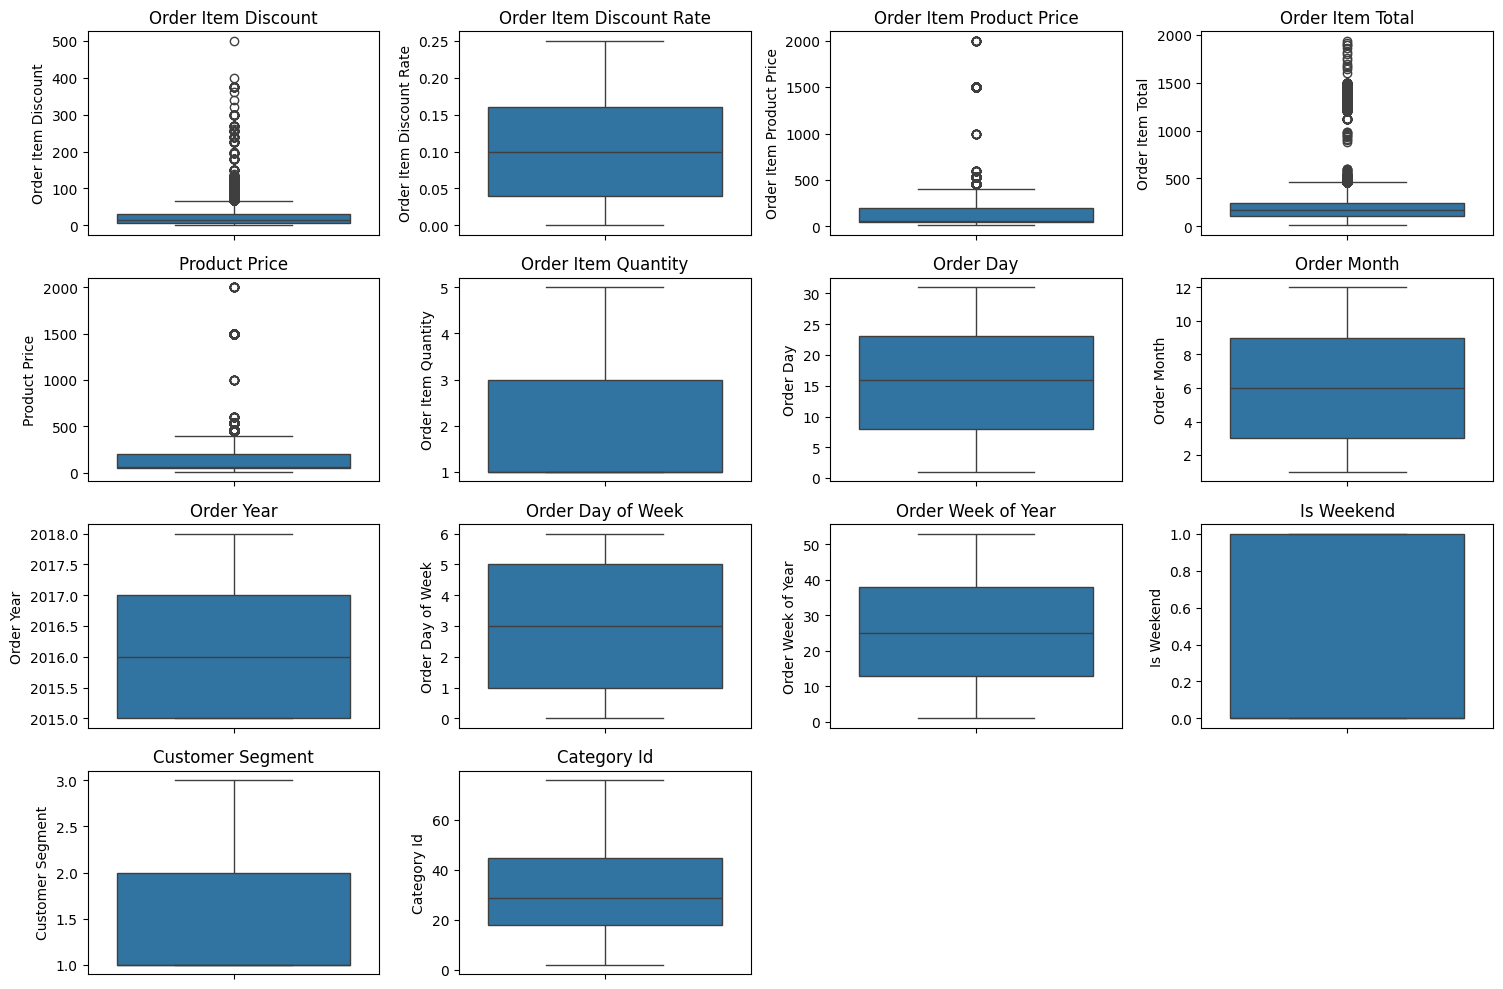

In [15]:
# checking for outliers
def check_for_outliers(data):
    plt.figure(figsize=(15,10))
    for i, column in enumerate (data.columns):
        plt.subplot(4 ,4 ,i + 1)
        sns.boxplot(data[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()

check_for_outliers(data_selected_features)

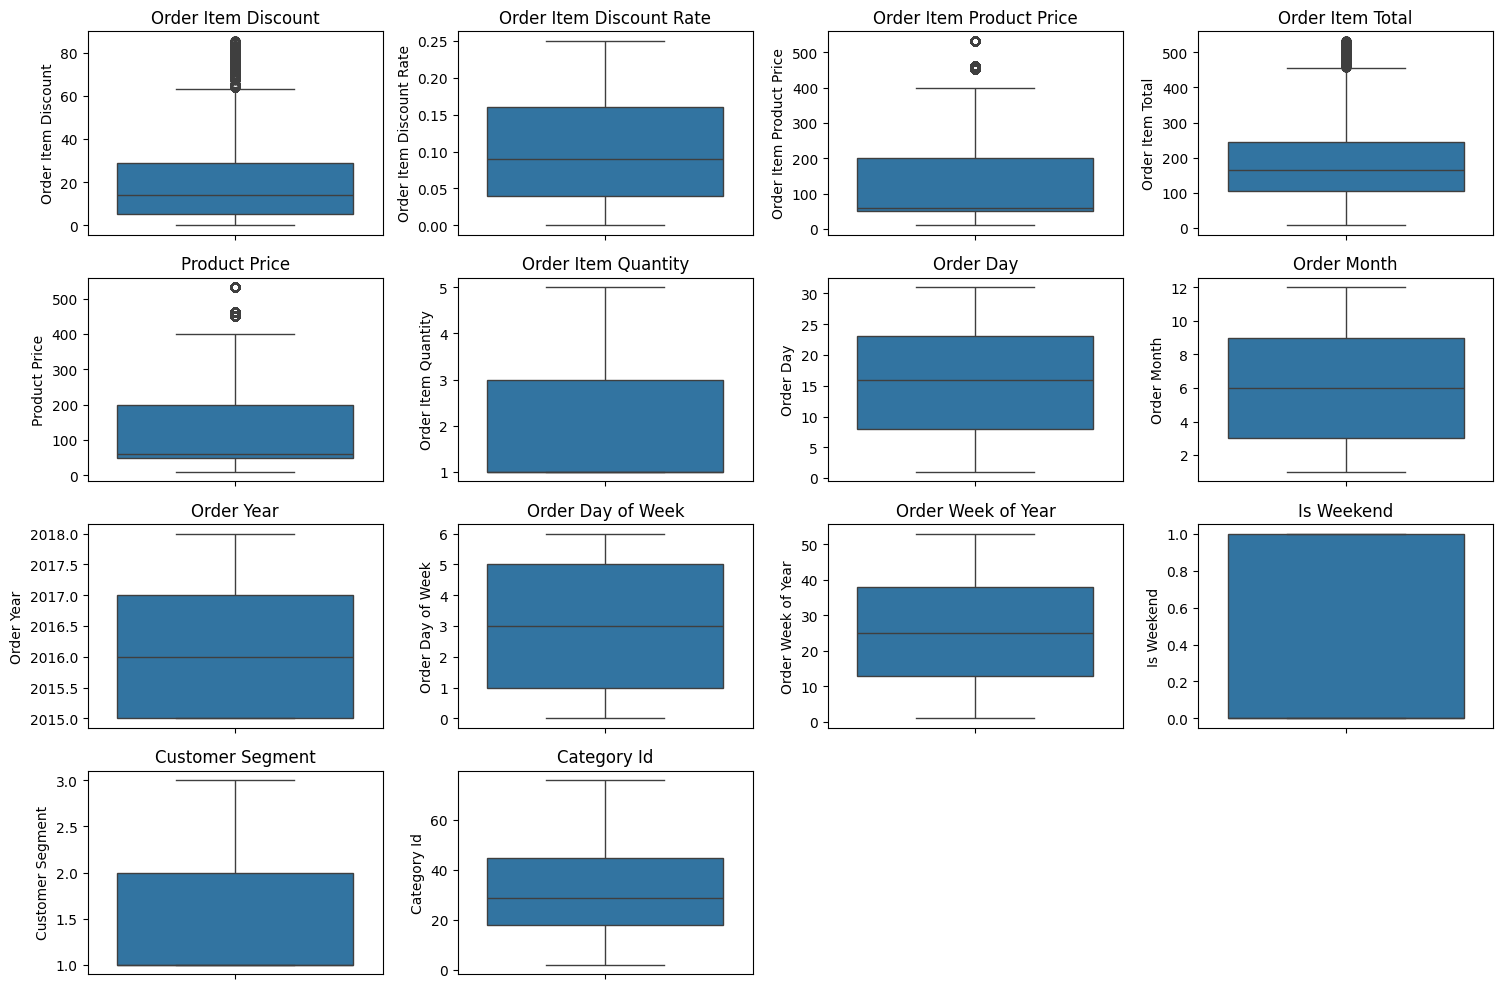

In [16]:
# removing outliers
def remove_outliers_zscore(data, features, threshold =3):
     # Calculate z-scores for specified features
    z_scores = data[features].apply(zscore)

    # Filter out data points with z-score above the threshold
    data = data[(np.abs(z_scores) < threshold).all(axis=1)]

    return data

# calling the function to remove outliers
outlier_features = ['Order Item Discount', 'Order Item Product Price', 'Order Item Total','Product Price']
data_selected_features = remove_outliers_zscore(data_selected_features, outlier_features)

# visualizing with box plots after outlier removal
check_for_outliers(data_selected_features)

In [17]:
data_selected_features.shape

(178220, 14)

In [19]:
data_selected_features.drop_duplicates()

,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Total,Product Price,Order Item Quantity,Order Day,Order Month,Order Year,Order Day of Week,Order Week of Year,Is Weekend,Customer Segment,Category Id
0,13.110000,0.04,327.750000,314.640015,327.750000,1,31,1,2018,2,5,0,1,73
1,16.389999,0.05,327.750000,311.359985,327.750000,1,13,1,2018,5,2,1,1,73
2,18.030001,0.06,327.750000,309.720001,327.750000,1,13,1,2018,5,2,1,1,73
3,22.940001,0.07,327.750000,304.809998,327.750000,1,13,1,2018,5,2,1,3,73
4,29.500000,0.09,327.750000,298.250000,327.750000,1,13,1,2018,5,2,1,2,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180510,68.000000,0.17,399.980011,331.980011,399.980011,1,16,1,2016,5,2,1,2,45
180511,72.000000,0.18,399.980011,327.980011,399.980011,1,16,1,2016,5,2,1,1,45
180514,0.000000,0.00,399.980011,399.980011,399.980011,1,16,1,2016,5,2,1,3,45
180517,12.000000,0.03,399.980011,387.980011,399.980011,1,15,1,2016,4,2,0,1,45


In [20]:
data_selected_features.shape

(178220, 14)